# **Hierarchical Clustering** 

Hierarchical clustering, also known as *hierarchical cluster analysis*, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

## Importing the libraries

In [ ]:
#Importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

## Importing the dataset

In [ ]:
#Converting Dataset into Dataframe using Pandas
from google.colab import files
data_to_load = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset = dataset.drop('CustomerID',axis=1)

## Exploratory Data Analysis

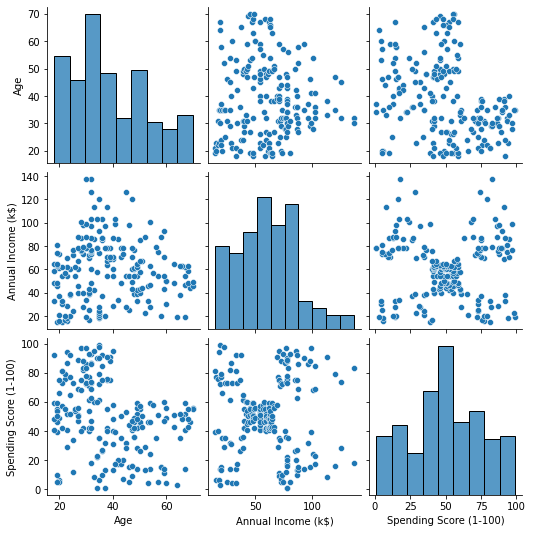

In [ ]:
#Creating Pair Plots using seaborn for all variables
sns.pairplot(dataset)

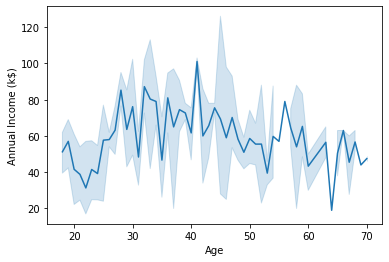

In [ ]:
sns.lineplot(data = dataset, x ='Age',y='Annual Income (k$)')

**Observation**: We observe that the income of the person varies with age, and so all the values are peaking around at the age of 45

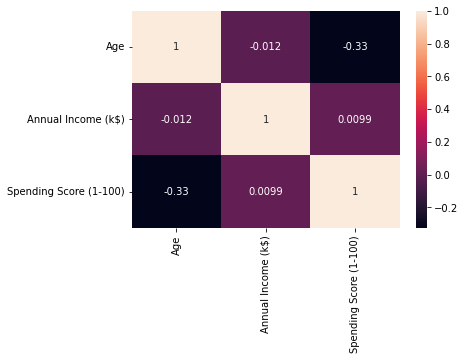

In [ ]:
sns.heatmap(dataset.corr(),annot=True)

**Observation**: Here, we see a somewhat negative correlation between Age and Spending, but no features are heavily correlated.

### In this case, for better visualization, we are going to be using only two factors two plot clusters properly.

In [ ]:
X = dataset.iloc[:, [2, 3]].values

## Using the dendrogram to find the optimal number of clusters

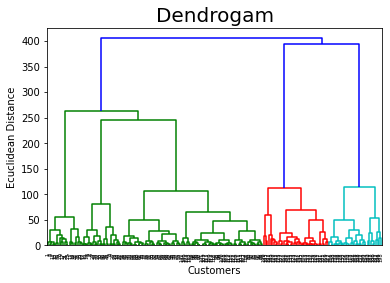

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

**Observation**: We observe that the highest line between the diffrences of the dendograms happens with the _Yellow_ line. Hence, we are going to create clusters equal to the number of lines cut there = 5. 

## Training the Hierarchical Clustering model on the dataset

In [ ]:
#Creating the clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5 , affinity = 'euclidean', linkage = 'ward')#Setting Hyperparameter to 5
y_hc = hc.fit_predict(X)

## Visualising the clusters

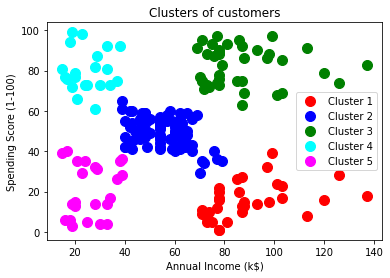

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Clusters of Customers Based on their Ages



```
# This is formatted as code
```

Here we can clearly see 5 clusters made using hierarchichal clustering method. Hence, we generate these results using the clustering method.

In [ ]:
X = dataset.iloc[:, [2, 3]].values
X.shape

(200, 2)

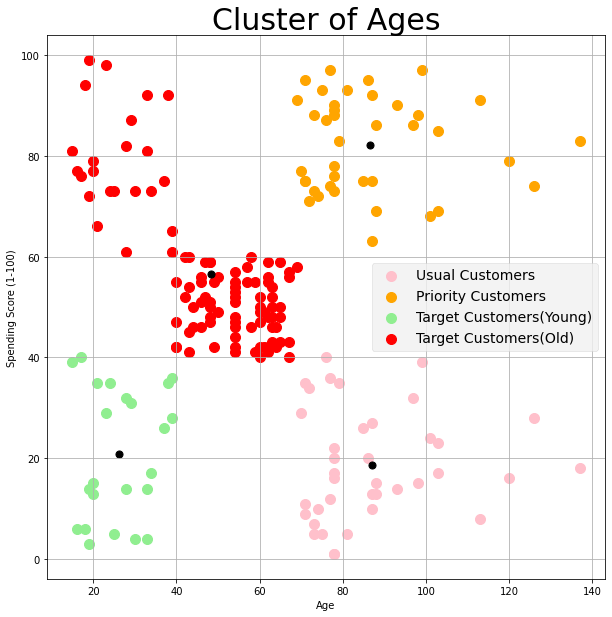

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(X)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(X[ymeans == 2, 0], X[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(X[ymeans == 3, 0], X[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x = dataset[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_


In [ ]:
dataset['labels'] =  labels
trace1 = go.Scatter3d(
    x= dataset['Age'],
    y= dataset['Spending Score (1-100)'],
    z= dataset['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = dataset['labels'], 
        size= 10,
        line=dict(
            color= dataset['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)
